In [32]:
import numpy as np
import matplotlib.pyplot as plt

sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

data = np.load('variables/variables_19072.npy', allow_pickle=True)
data.item().keys()
for i in data.item().keys():
    print(len(data.item()[i]), ' ', i)

19073   step
19072   train_loss
19073   val_loss
19072   hellaswg_acc
19072   lr


# lr

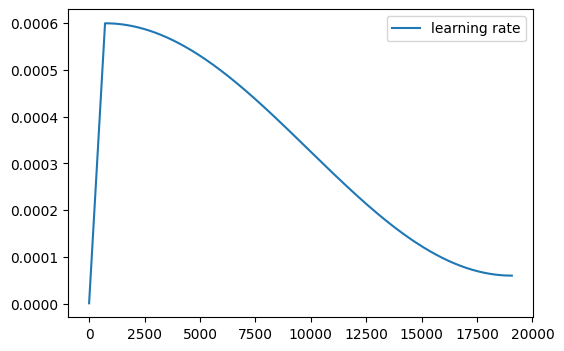

In [20]:
plt.figure(figsize=(6,4))
plt.plot(data.item()['lr'], label='learning rate')
plt.legend()
plt.savefig('assets/lr.png')
plt.show()

# lr=6e-4, T=1024, max_step=1epoch

In [45]:
def remove_None(step: list, data: list) -> tuple[tuple, tuple]:
    '''去除列表中的None，并且不改变指针'''
    assert len(step) == len(data), "ArithmeticError: step and data must have same length"
    ziped = [(s, d) for s, d in zip(step, data) if d is not None]
    step, data = zip(*ziped)
    return step, data

step = data.item()['step'][:-1]
train_loss = data.item()['train_loss']
val_loss = data.item()['val_loss'][:-1]
hellaswg_acc = data.item()['hellaswg_acc']

step_val, step_val_loss = remove_None(step, val_loss)
step_hellaswg, step_hellaswg_acc = remove_None(step, hellaswg_acc)


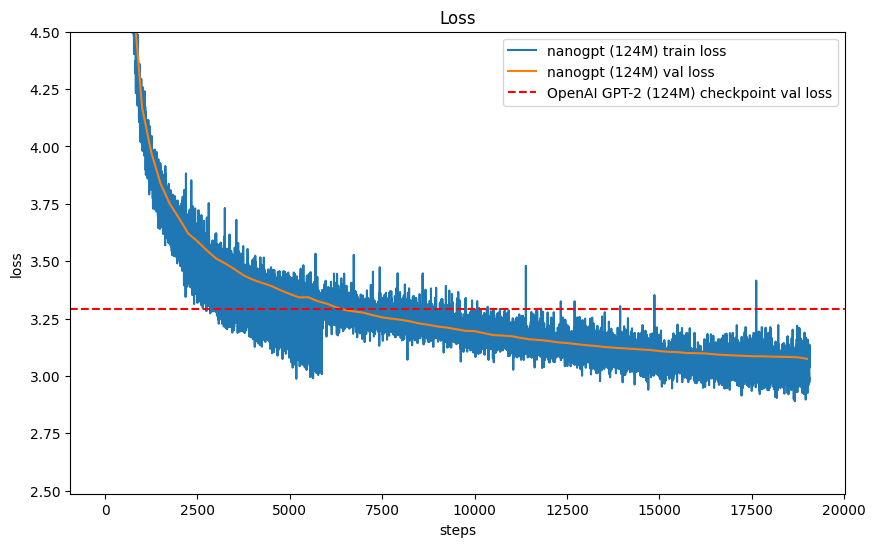

In [48]:
plt.figure(figsize=(10, 6))

plt.plot(step, train_loss, label=f'nanogpt ({sz}) train loss')
plt.plot(step_val, step_val_loss, label=f'nanogpt ({sz}) val loss')
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
# plt.yscale('log')
plt.ylim(top=4.5)
plt.legend()
plt.title("Loss")
plt.savefig('assets/lr=6e-4,T=1024,max_step=1epoch--loss.png', dpi=300)
plt.show()

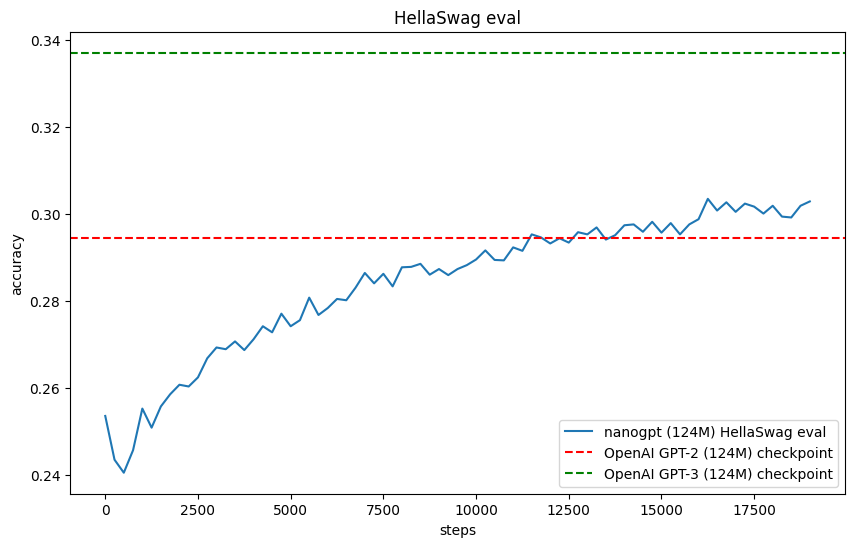

In [49]:
# plt.subplot(122)
plt.figure(figsize=(10, 6))
plt.plot(step_hellaswg, step_hellaswg_acc, label=f"nanogpt ({sz}) HellaSwag eval")
# horizontal line at GPT-2 baseline
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")
plt.savefig('assets/lr=6e-4,T=1024,max_step=1epoch--eval.png', dpi=300)
plt.show()
# print("Max Hellaswag eval:", max(ys))

# lr=6e-4, T=1024, max_step=4epoch

# lr=6e-4, T=2048, max_step=4epoch

# lr=6e-4 * 4, T=2048, max_step=4epoch